<a href="https://colab.research.google.com/github/YasirHabib/Deep-Learning-Convolutional-Neural-Networks-in-Python/blob/master/svhn_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [0]:
class CNN():
  def __init__(self, size):
    self.size = size
    
  def fit(self, Xtrain, Ytrain, Xtest, Ytest):
    N = Xtrain.shape[0]
    K = len(set(Ytrain))
    
    model = Sequential()
    
    model.add(Conv2D(20, (5,5), padding='SAME', activation='relu', input_shape=(32,32,3))) # filter size=5,5, num_feature_maps=20
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(50, (5,5), padding='SAME', activation='relu')) # filter size=5,5, num_feature_maps=50
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Flatten())
    model.add(Dense(self.size, activation='relu')) # model.add(Dense(self.size, activation='relu', input_dim=3200))
    model.add(Dropout(0.3))
    model.add(Dense(K, activation='softmax'))
    
    model.compile(
        loss = 'sparse_categorical_crossentropy',
        optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True),
        metrics = ['accuracy']
    )
    
    r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=15, batch_size=32, verbose=0)
    
#     predictions = model.predict(Xtest)
#     print(predictions.shape)
    
    print(r.history.keys())
    
    plt.plot(r.history['loss'], label='Training cost')
    plt.plot(r.history['val_loss'], label='Test cost')
    plt.legend()
    plt.show()
    
    plt.plot(r.history['acc'], label='Training accuracy')
    plt.plot(r.history['val_acc'], label='Test accuracy')
    plt.legend()
    plt.show()

In [0]:
def main():
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount = True)
  
  train = scipy.io.loadmat('/content/gdrive/My Drive/Colab Notebooks/Convolutional Neural Networks/train_32x32.mat')
  test = scipy.io.loadmat('/content/gdrive/My Drive/Colab Notebooks/Convolutional Neural Networks/test_32x32.mat')
  
  Xtrain = train['X']
  Ytrain = train['y']
  #print(Xtrain.shape)           (32, 32, 3, 73257)
  #print(Ytrain.shape)           (73257, 1)
  Ytrain = Ytrain.flatten() - 1
  
  Xtest = test['X']
  Ytest = test['y']
  #print(Xtest.shape)            (32, 32, 3, 26032)
  #print(Ytest.shape)            (26032, 1)
  Ytest = Ytest.flatten() - 1
  
  Xtrain = (Xtrain.transpose(3,0,1,2) / 255).astype(np.float32)
  Xtest = (Xtest.transpose(3,0,1,2) / 255).astype(np.float32)
  
  model = CNN(500)
  model.fit(Xtrain, Ytrain, Xtest, Ytest)

Mounted at /content/gdrive
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


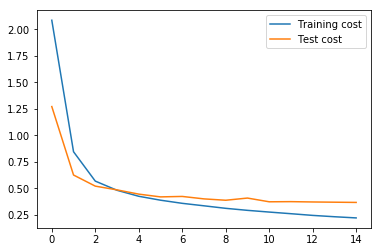

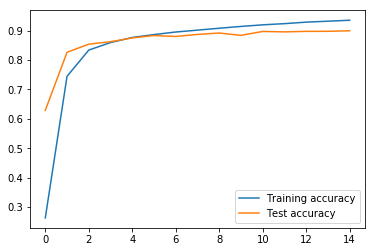

In [10]:
if __name__ == '__main__':
  main()